# Лабораторна робота №10. Жадібна стратегія на прикладі кодування Гафмена
## Виконав студент групи КН23-1 Сидоренко Андрій

__Мета.__ _Навичтись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python._ 

### Завдання на самостійну роботу

* Побудувати дерево кодів Гафмена *згідно з варіантом індивідуального завдання практичної роботи № 9*, виданим викладачем вручну і візуалізувати дерево.

__Відповідь:__

ABABACACABABABCABABC Варіант 18

а - 9 (0)


b - 7 (11)


c - 4  (10)

0110110100100110110111001101110

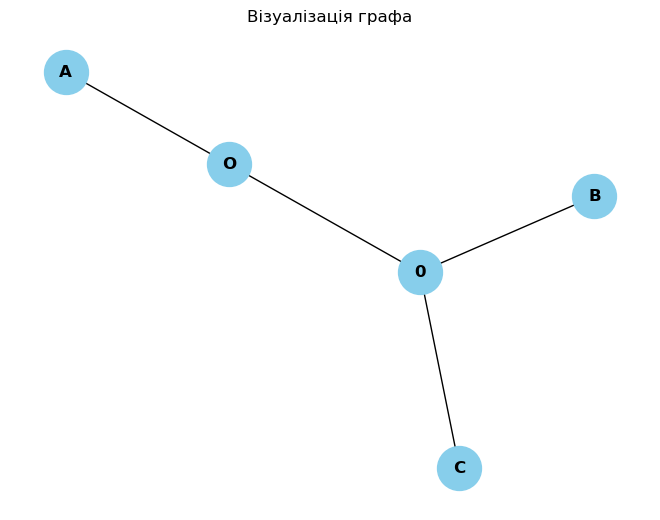

In [48]:
import matplotlib.pyplot as plt##Взято з лаби для +- розуміння
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра
edges = [('O','A'),('O',0),(0,'B'),(0,'C')]

# Додаємо ребра до графа
G.add_edges_from(edges)

# Візуалізуємо граф
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Візуалізація графа")
plt.show()

In [42]:
from graphviz import Digraph # Ралізація дерва в png

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def add_nodes(graph, node, parent_name=None):
    if node is not None:
        node_name = f'{node.value}'
        graph.node(node_name, node_name)
        if parent_name is not None:
            graph.edge(parent_name, node_name)
        add_nodes(graph, node.left, node_name)
        add_nodes(graph, node.right, node_name)

def visualize_binary_tree(root):
    graph = Digraph(format='png')
    graph.node('root', 'root')
    add_nodes(graph, root, 'root')
    graph.view()

# Приклад мого бінарного дерева
#        0
#       / \
#      A   0  
#        / \
#       B   C

root = Node('o')
root.left = Node('a')
root.right = Node(0)
root.right.right = Node('c')
root.right.left = Node('b')


visualize_binary_tree(root)

* Перевірити результат за допомогою коду, наведеному вище.

__Відповідь:__

In [2]:
# A Вузол дерева Гафмана 
import heapq 


class node: 
    def __init__(self, freq, symbol, left=None, right=None): 
        # частота символу 
        self.freq = freq 

        # назва символу (символ) 
        self.symbol = symbol 

        # вузол ліворуч від поточного вузла 
        self.left = left 

        # вузол праворуч від поточного вузла 
        self.right = right 

        # напрямок дерева (0/1) 
        self.huff = '' 

    def __lt__(self, nxt): 
        return self.freq < nxt.freq 


# утиліта для виведення кодів Гафмена для  
#  всіх символів у щойно створеному дереві Гафмена 
def printNodes(node, val=''): 

    # Код Гафмена для поточного вузла  
    newVal = val + str(node.huff) 

# якщо вершина не є реберною вершиною 
# то пройти всередині неї 
    if(node.left): 
        printNodes(node.left, newVal) 
    if(node.right): 
        printNodes(node.right, newVal) 

        # якщо node є реберною вершиною тоді 
        # вивести його хаффманівський код 
    if(not node.left and not node.right): 
        print(f"{node.symbol} -> {newVal}") 


# символи для дерева Гафмена 
chars = ['a', 'b', 'c'] 

# частота символів 
freq = [9, 7, 4] 

# список, що містить невикористані вершини 
nodes = [] 

# перетворення символів та частот 
# у вузли дерева Гафмена 

for x in range(len(chars)): 
    heapq.heappush(nodes, node(freq[x], chars[x])) 

while len(nodes) > 1: 

    # відсортувати всі вершини за зростанням 
    # на основі їх частоти 
    left = heapq.heappop(nodes) 
    right = heapq.heappop(nodes) 

    # присвоїти значення напрямку цим вузлам 
    left.huff = 0
    right.huff = 1

    # об'єднати 2 найменші вершини, щоб створити 
    # новий вузол як їхній батько 
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right) 

    heapq.heappush(nodes, newNode) 

# Друк кодів Гафмена
printNodes(nodes[0]) 

a -> 0
c -> 10
b -> 11


* Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів  `chars` та список їх частот `freq`. 

__Відповідь:__

In [5]:
import heapq
from collections import Counter

class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        # частота символу
        self.freq = freq

        # назва символу (символ)
        self.symbol = symbol

        # вузол ліворуч від поточного вузла
        self.left = left

        # вузол праворуч від поточного вузла
        self.right = right

        # напрямок дерева (0/1)
        self.huff = ''

    def __lt__(self, nxt):
        return self.freq < nxt.freq

# утиліта для виведення кодів Гаффмана для
# всіх символів у щойно створеному дереві Гаффмана
def get_huffman_codes(node, val='', huffman_code={}):
    # Код Гаффмена для поточного вузла
    newVal = val + str(node.huff)

    # якщо вершина не є реберною вершиною
    # то пройти всередині неї
    if node.left:
        get_huffman_codes(node.left, newVal, huffman_code)
    if node.right:
        get_huffman_codes(node.right, newVal, huffman_code)

    # якщо node є реберною вершиною тоді
    # зберегти його хаффманівський код у словнику
    if not node.left and not node.right:
        huffman_code[node.symbol] = newVal

    return huffman_code

def huffman_coding(message):
    # Підрахунок частот символів у повідомленні
    freq_dict = Counter(message)
    
    # Створення списків chars і freq
    chars = list(freq_dict.keys())
    freq = list(freq_dict.values())

    # Список, що містить невикористані вершини
    nodes = []

    # Перетворення символів та частот у вузли дерева Гаффмана
    for x in range(len(chars)):
        heapq.heappush(nodes, Node(freq[x], chars[x]))

    while len(nodes) > 1:
        # Відсортувати всі вершини за зростанням
        # на основі їх частоти
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)

        # Присвоїти значення напрямку цим вузлам
        left.huff = 0
        right.huff = 1

        # Об'єднати 2 найменші вершини, щоб створити
        # новий вузол як їхній батько
        newNode = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)

        heapq.heappush(nodes, newNode)

    # Отримання кодів Гаффмана
    huffman_code = get_huffman_codes(nodes[0])

    # Закодувати повідомлення
    encoded_message = ''.join([huffman_code[char] for char in message])

    return encoded_message, huffman_code

# Приклад використання
message = "ABABACACABABABCABABC"
encoded_message, huffman_code = huffman_coding(message)
print(f"Encoded message: {encoded_message}")
print("Huffman Codes:", huffman_code)


Encoded message: 0110110100100110110111001101110
Huffman Codes: {'A': '0', 'C': '10', 'B': '11'}


* Опрацювати самостійно тему [декодування Гафмена](https://www.geeksforgeeks.org/huffman-decoding/?ref=gcse) і скориставшись наведеним там кодом, декодувати повідомлення, задане варіантом.

А що декодувати то? Ну ок

In [6]:
import heapq #з Huffman Decoding
from collections import defaultdict
 
# to map each character its huffman value
codes = {}
 
# To store the frequency of character of the input data
freq = defaultdict(int)
 
# A Huffman tree node
class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq
 
    def __lt__(self, other):
        return self.freq < other.freq
 
# utility function to print characters along with
# there huffman value
def printCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        print(root.data, ":", str)
    printCodes(root.left, str + "0")
    printCodes(root.right, str + "1")
 
# utility function to store characters along with
# there huffman value in a hash table
def storeCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    storeCodes(root.left, str + "0")
    storeCodes(root.right, str + "1")
 
# function to build the Huffman tree and store it
# in minHeap
def HuffmanCodes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    storeCodes(minHeap[0], "")
 
# utility function to store map each character with its
# frequency in input string
def calcFreq(str, n):
    for i in range(n):
        freq[str[i]] += 1
 
# function iterates through the encoded string s
# if s[i]=='1' then move to node->right
# if s[i]=='0' then move to node->left
# if leaf node append the node->data to our output string
def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right
 
        # reached leaf node
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'
 
# Driver code
if __name__ == "__main__":
    minHeap = []
    str = "ABABACACABABABCABABC"
    encodedString, decodedString = "", ""
    calcFreq(str, len(str))
    HuffmanCodes(len(str))
    print("Character With there Frequencies:")
    for key in sorted(codes):
        print(key, codes[key])
 
    for i in str:
        encodedString += codes[i]
 
    print("\nEncoded Huffman data:")
    print(encodedString)
 
    # Function call
    decodedString = decode_file(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

Character With there Frequencies:
A 0
B 11
C 10

Encoded Huffman data:
0110110100100110110111001101110

Decoded Huffman Data:
ABABACACABABABCABABC 


## Завдання на лабораторну роботу

1. Створити Notebook-документ за допомогою Jupyter Notebook. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)) і  реалізувати контрольні приклади, що розглядаються у даній роботі та виконати завдання, що винесено на самостійну роботу.

1. Дати відповіді на контрольні запитання.

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_10_StudentLasName.ipynb --to html`

1. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_10_StudentLasName.ipynb` та `lab_10_StudentLasName.html`

## Контрольні запитання

1. Що таке жадібні алгоритми?


__Відповідь:__

Жадібні алгоритми — це клас алгоритмів, які приймають локально оптимальні рішення на кожному кроці з надією, що вони призведуть до глобально оптимального розв'язку задачі.

2. Що таке префіксний код? Який код використовується у коді Гафмена?

__Відповідь:__

Префіксний код — це такий код, де жодне кодове слово не починається з послідовності бітів, що утворює інше кодове слово. 

Як раз таки префіксний код і використовується в коді Гафмена.

3. Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?

__Відповідь:__

Черга з пріоритетами часто реалізується з використанням купи, оскільки вона надає швидкий доступ до найвищого пріоритету та ефективне додавання нових елементів.

Купа — це деревоподібна структура даних, де кожен вузол має значення, а також може мати дочірні вузли. Черга з пріоритетами, як правило, забезпечує швидкий доступ до найвищого пріоритету

4. Що таке стиснення даних і для чого воно використовується? Які його головні переваги?

__Відповідь:__

Стиснення даних — це процес зменшення обсягу даних за допомогою різних методів або алгоритмів. До головних переваг стиснення відноситься економія місця, зменшння даних для передачі, покращння продуктивності, швидша обробка даних після стиснення.

5. Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?

__Відповідь:__

* Підрахувати кількість і частоту повторення кожного символу
* Побудувати дерево Гафмена на основі якого потім кожному символу присвоїти бітовий код
* Замінити кожеен символ його кодом

6. Які головні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?

__Відповідь:__

До обмежень і недоліків я би відніс те, що алгоритм не ефективний на великому обсязі даних та додаткове місце для збереження дерева Гафмена. Якщо деякі  символи входять в даних значно частіше, ніж інші, то можуть виникнути проблеми з ефективністю стиснення. 


Для покращення алгоритму Гафмена, його можна комбінувати з іншими методами стиснення, зробити для нього адаптивний підхід, або використовувати в залежності від типу даних, для кращого стиснення та використання.

7. Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?

__Відповідь:__

Для стиснення зображень та відео краще використовувати JPEG та MPEG, які розроблені для роботи з великими обсягами даних використовуючи різні методи.


Для аудіо-  MP3 та AAC.  


Алгоритм LZ77 / LZ78 / LZW використовуються у форматах стиснення даних, таких як ZIP (LZ77) і GIF (LZW), використовують словарну модель для заміни повторюваних фрагментів даних на посилання на попередні фрагменти.

8. Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних ситемах?

__Відповідь:__

Зберігання даних, передача через мережу, архівація, стиснення текстової інформації, використання в мультимедії